# Task 2

### Importing Libraries and Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
payment_df = pd.read_csv("payment-sample.csv",index_col='id')
payment_df.head()

,user_id,ad_id,cart_id,source,gateway,trx_id,status,amount,total,currency,payment_date,description
id,,,,,,,,,,,,
1832408,72245,NaN,787666.0,order,segpay,49382149,confirmed,50.00,50.0,NaN,2018-01-01 00:00:17,Gift Card $50.00 = $50
1832410,72245,NaN,NaN,giftcard,segpay,NaN,confirmed,50.00,NaN,NaN,2018-01-01 00:00:17,GiftCard Purchase
1832412,41903,316451.0,NaN,order,NaN,NaN,confirmed,0.50,0.0,NaN,2018-01-01 00:02:27,Page 1 (5 Hours from 5:02 PM) = $0.5
1832414,41903,NaN,NaN,giftcard,NaN,NaN,confirmed,-0.50,NaN,NaN,2018-01-01 00:02:27,Spending for order 1832412
1832416,25561,388809.0,NaN,order,NaN,NaN,confirmed,2.99,0.0,NaN,2018-01-01 00:04:07,Auto Repost (1 Reposts x $2.99) = $2.99


In [3]:
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2118612 entries, 1832408 to 5963081
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   user_id       int64  
 1   ad_id         float64
 2   cart_id       float64
 3   source        object 
 4   gateway       object 
 5   trx_id        object 
 6   status        object 
 7   amount        float64
 8   total         float64
 9   currency      object 
 10  payment_date  object 
 11  description   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 210.1+ MB


In [4]:
user_df = pd.read_csv("user-sample.csv")
user_df.head()

,user_id,signup_date,status,miserable
0,1,2013-08-08 06:18:09,emailverified,1.0
1,172,2011-05-06 19:02:52,emailverified,NaN
2,191,2011-05-06 19:29:31,emailverified,NaN
3,226,2011-05-06 20:12:16,emailverified,NaN
4,236,2011-05-06 20:38:12,emailverified,NaN


In [5]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61385 entries, 0 to 61384
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      61385 non-null  int64  
 1   signup_date  61385 non-null  object 
 2   status       61385 non-null  object 
 3   miserable    1709 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.9+ MB


### Data Cleaning

###### Check NaN values in all the columns of each dataframe

In [6]:
payment_df.isnull().sum()

user_id               0
ad_id            810945
cart_id         1568175
source                0
gateway         1462164
trx_id          1524730
status                0
amount                0
total            703224
currency         502908
payment_date          0
description           0
dtype: int64

In [7]:
user_df.isnull().sum()

user_id            0
signup_date        0
status             0
miserable      59676
dtype: int64

###### Replacing the NaN values with appropriate values as we can't ignore the NaN rows for they carry important information.

In [8]:
payment_df['gateway'] = payment_df['gateway'].fillna('unknown')
payment_df['currency'] = payment_df['currency'].fillna('unknown')
payment_df['total'] = payment_df['total'].fillna(0)

In [9]:
user_df['miserable'] = user_df['miserable'].fillna(0)

### Feature Engineering

In [10]:
payment_df['payment_date'] = pd.to_datetime(payment_df['payment_date'])
payment_df['date'] = payment_df['payment_date'].dt.date
payment_df['month'] = payment_df['payment_date'].dt.month 
payment_df['year'] = payment_df['payment_date'].dt.year

### Data Analysis

##### 1.Summarise monthly money earned (revenue) for 2018 - money earned = `payment.total`

###### We checked and found that the data in the dataset is only for 2018. Thus using the groupby clause 'month' in 'payment_df' and aggregating the sum in column 'total' we found the revenue per month in the new dataframe - 'revenue_per_month'
###### N.B -The revenue generated is the aggregated sum of the total per month. We have not considered currency conversions as there are data points having where currency has not been specified.

In [11]:
payment_df['year'].unique()

array([2018], dtype=int64)

In [12]:
revenue_per_month = pd.DataFrame({'revenue' :payment_df.groupby(by=payment_df['month'])['total'].sum()})
revenue_per_month

,revenue
month,
1,135663.38
2,127326.60
3,152101.30
4,512944.35
5,752288.46
6,997938.07
7,1023178.07
8,1142552.84
9,1077359.17


##### 2.List all users that spent more than €5 using credit card in 2018 - credit card gateways are ‘segpay’,’wirecard_ee’,’ccbill’,’wirecard’,’stripe’

###### A new dataframe 'user_list_2' is created from 'payment_df'. The dataframe is created filtering only credit card payments made and amounting to more than €5. Later, only the distinct user_ids of such users are retained in a list of the same name.

In [13]:
user_list_2 = payment_df[(payment_df['gateway'].isin(['segpay','wirecard_ee','ccbill','stripe','wirecard'])) 
             & (payment_df['total'] > 5) & (payment_df['currency'] == 'EUR')]
user_list_2 = user_list_2['user_id'].unique()
user_list_2.tolist()

[114336,
 121100,
 115266,
 87949,
 37685,
 129670,
 91529,
 108036,
 71931,
 124888,
 116510,
 115780,
 126906,
 120430,
 124692,
 122000,
 111322,
 149372,
 122740,
 102212,
 184164,
 78151,
 158598,
 38047,
 58889,
 30417,
 56463,
 107712,
 163944,
 115832,
 93948,
 176124,
 118914,
 122550,
 126772,
 88677,
 174284,
 163586,
 130302,
 58971,
 178962,
 141916,
 86541,
 140766,
 122178,
 147762,
 135080,
 135330,
 129622,
 119432,
 137138,
 111796,
 152868,
 117086,
 130564,
 117632,
 48321,
 114862,
 127708,
 153568,
 117794,
 114696,
 175628,
 81283,
 114892,
 120722,
 120208,
 114278,
 118782,
 146842,
 123074,
 51003,
 138200,
 84924,
 114908,
 114204,
 119234,
 122690,
 115540,
 47461,
 101178,
 66641,
 123782,
 118618,
 162456,
 115604,
 117956,
 145492,
 82163,
 114234,
 181032,
 112778,
 184630,
 123032,
 95540,
 97820,
 132282,
 111286,
 183298,
 131020,
 57191,
 138250,
 126894,
 115844,
 131822,
 100110,
 114512,
 114570,
 180960,
 99334,
 118222,
 158868,
 113042,
 146888

##### 3. Segment users into high/medium/low segments in terms of money spent per day - what are your justifications on this classification?
    a. Money spent is orders exclusive of giftcard top-ups


###### A new dataframe 'spending_order' is created by filtering only 'order' from 'payment_df'. Further, 'spending_order_per_day' is created by grouping by 'user_id' and 'date' and agregating total spend per day.
    a. The average spending per day was found to be 25.74.
    b. 25 percentile users spend 5.98 per day.
    c. 50 percentile users spend 13.5 per day.
    d. 75 percentile users spend 29.59 per day.
    e. However, the maximun spending per day by a certain user was found to be 9130.56
    f. Maximum users have spent 2.99 per day.
    g. The data points are found to be extremely right skewed. This is confirmed by the  density as well as box plots below.

In [14]:
spending_order = payment_df[(payment_df.source == 'order') & (payment_df.total > 0)]

spending_order_per_day = pd.DataFrame({'total_per_day' : spending_order.groupby(['user_id','date'])['total'].sum()}).reset_index()
spending_order_per_day.head()

,user_id,date,total_per_day
0,1,2018-01-17,190.44
1,1,2018-01-30,2.19
2,172,2018-01-04,19.90
3,172,2018-01-12,19.90
4,172,2018-01-18,20.89


In [15]:
spending_order_per_day.total_per_day.describe()

count    372229.000000
mean         25.746811
std          63.472121
min           0.020000
25%           5.980000
50%          13.500000
75%          29.590000
max        9130.560000
Name: total_per_day, dtype: float64

In [16]:
spending_order_per_day.total_per_day.mode()

0    2.99
dtype: float64

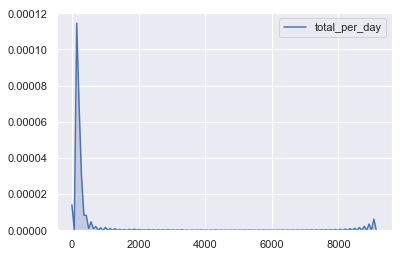

In [17]:
sns.kdeplot(spending_order_per_day.total_per_day,shade=True);

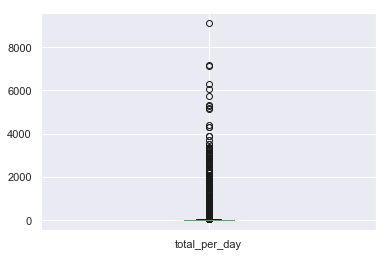

In [18]:
spending_order_per_day.total_per_day.plot(kind='box');

###### Finding the average spend per user per day. This is to normalize spending per user per day. 

In [19]:
avg_spend_per_user = pd.DataFrame({'avg_spend' : spending_order_per_day.groupby('user_id')['total_per_day'].mean()}).reset_index()

In [20]:
avg_spend_per_user.describe()

,user_id,avg_spend
count,24268.000000,24268.000000
mean,197519.379842,21.016190
std,91831.307869,38.072753
min,1.000000,0.020000
25%,121737.000000,5.680000
50%,175187.000000,12.440767
75%,277494.000000,25.660500
max,377316.000000,2512.847500


###### We define three buckets to create segregate users based on their spending habit:
    a. H - For high spending users 
    b. M - For medium spending users
    c. L - For low spending users

The classification is based on the quartile(.25,.5,.75) for 'total_per_day' of 'spending_order_per_day'. The average spending of each user is compared and put accordingly in appropriate bucket.
    

In [21]:
#defining three buckets - H/M/L as per per_day_spend
H = avg_spend_per_user['user_id'][avg_spend_per_user['avg_spend'] > 29.59] 
M = avg_spend_per_user['user_id'][(avg_spend_per_user['avg_spend'] > 13.5) & (avg_spend_per_user['avg_spend'] <= 29.59)]
L = avg_spend_per_user['user_id'][avg_spend_per_user['avg_spend'] <= 13.5]

H = H.to_list()
M = M.to_list()
L = L.to_list()

##### 4. List of users matching this criteria:
    a. Email is verified
    b. Not miserable user
    c.If they spend 10% or more in crypto in December than in November using credit card


###### The 'user_df' dataframe is filtered only to keep the users having verified email (status == 'emailverified') & are not miserable (miserable == 0).

In [22]:
user_df = pd.DataFrame({"user_id": user_df['user_id'][(user_df.status == 'emailverified') 
                                                     & (user_df.miserable == 0)]})
user_df

,user_id
1,172
2,191
3,226
4,236
6,418
...,...
61356,377217
61361,377231
61366,377242
61368,377247


###### Two new dataframes are created from 'payment_df':
    a. crypto_users_dec - This dataframe is filtered from the parent by considering payments made with crypto coins in the month of December.
    b. credit_card_nov  - This dataframe is filtered from the parent by considering payments made with credit card in the month of November.

In [23]:
crypto_users_dec = payment_df[(payment_df.gateway.isin(['crypto:ltc','crypto','crypto:eth','crypto:btc','crypto:btg'
                     ,'crypto:bch','crypto:dash','crypto:etc']))  & (payment_df['total'] > 0) 
                  & (payment_df['month'] == 12) & (payment_df['source'] == 'order')]

credit_card_nov = payment_df[(payment_df['gateway'].isin(['segpay','wirecard_ee','ccbill','stripe','wirecard'])) 
                  & (payment_df['total'] > 0 ) & (payment_df['month'] == 11) & (payment_df['source'] == 'order')]


###### Further, two more dataframes are created:
    a. crypto_users_dec_spend - This is created from crypto_users_dec, using the group  by clause on user_id and taking the aggregate sum of the 'total'.
    b. credit_card_nov_spend  - This is created from credit_card_nov, using the group by clause on user_id and taking the aggregate sum of the 'total'.

In [24]:
crypto_users_dec_spend = pd.DataFrame({'total' : crypto_users_dec.groupby('user_id')['total'].sum()}).reset_index()

credit_card_nov_spend = pd.DataFrame({'total' : credit_card_nov.groupby('user_id')['total'].sum()}).reset_index()


###### 'user_list_4' dataframe is created by merging 'crypto_users_dec_spend' & 'credit_card_nov_spend'. The merge function is performed using inner join. A new column 'diff' is added to the dataframe. Here, the aggregated difference of total spending with crypto coins in December and total spending with credit card in November is calculated for each user. The dataframe is filtered to keep on those users who spent more in December. Another column 'percentage' is added to calculate the percentage increase in spending. A list is made with the same name, keeping user_ids of users whose spending increased atleast 10%. 

In [25]:
user_list_4 = crypto_users_dec_spend.merge(credit_card_nov_spend,on='user_id', how='inner')
user_list_4 = user_list_4.rename(columns = {'total_x':'total_crypto','total_y':'total_cc'})
user_list_4['diff'] = user_list_4['total_crypto']-user_list_4['total_cc']
user_list_4 = user_list_4[user_list_4['diff']>0]
user_list_4['percentage'] = (user_list_4['diff']/user_list_4['total_cc'])*100
user_list_4 = user_list_4['user_id'][user_list_4['percentage']>10]
user_list_4.tolist()

[51319,
 63183,
 70195,
 72627,
 75631,
 77353,
 79259,
 81341,
 86004,
 86024,
 87051,
 87295,
 99924,
 100198,
 102316,
 110328,
 110978,
 112486,
 112522,
 113042,
 114130,
 114202,
 114308,
 114412,
 114480,
 114512,
 114622,
 114742,
 114924,
 115382,
 115838,
 116300,
 116334,
 116422,
 116608,
 116772,
 116912,
 117274,
 117606,
 117710,
 117918,
 118178,
 118526,
 118584,
 118636,
 118720,
 119152,
 119592,
 120454,
 120580,
 121046,
 121850,
 121930,
 122648,
 122872,
 124216,
 126064,
 128070,
 128532,
 128656,
 128778,
 128992,
 132364,
 132940,
 134448,
 135106,
 138596,
 144138,
 147786,
 150310,
 156356,
 157268,
 158590,
 159628,
 167520,
 169792,
 171444,
 175374,
 175400,
 180954,
 185546,
 187628,
 190778,
 221420,
 222902,
 230752,
 234852,
 244836,
 246218,
 247876,
 256204,
 261958,
 269018,
 270876,
 272598,
 276822,
 277190,
 278590,
 281128,
 281360,
 283070,
 283536,
 287804,
 288272,
 289816,
 289840,
 292548,
 294526,
 295456,
 299458,
 302296,
 305290,
 3111

##### 5. Monthly gift card spent in € for 2018.

###### A new dataframe 'monthly_spend_gift_card_eur' is created from 'payment_df', filtering only giftcard and currency as EUR. Further, we observe from the dataframe that spending occured when in column 'description' starts with 'Spending'. Thus, we again filter and keep only those which satisfy the above condition. Atlast group by clause is made on 'month' upon 'amount' to calculate the aggregated sum. The absolute revenue is displayed on a new dataframe - 'revenue_per_month_gift_card' 

In [26]:
monthly_spend_gift_card_eur = payment_df[(payment_df.source == 'giftcard') & (payment_df.currency == 'EUR')]
monthly_spend_gift_card_eur['description'] = monthly_spend_gift_card_eur['description'].str.split(n=1).str[0]
monthly_spend_gift_card_eur = monthly_spend_gift_card_eur[monthly_spend_gift_card_eur.description == 'Spending'].groupby('month')['amount'].sum()

In [27]:
revenue_per_month_gift_card = pd.DataFrame({'revenue_eur':monthly_spend_gift_card_eur.abs()})
revenue_per_month_gift_card

,revenue_eur
month,
6,130124.45
7,433553.56
8,474276.99
9,468485.27
10,493919.82
11,580442.48
12,571381.84
